In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


use_errors = True

In [3]:
altitude = []
temp = []
gravity = []
pressure = []
density = []
viscosity = []

In [4]:
npoints = 0
with open('density.txt') as f:
    for line in f:
        npoints=npoints+1
        data = line.split()
        altitude.append(float(data[0]))
        temp.append(float(data[1]))
        gravity.append(float(data[2]))
        pressure.append(float(data[3]))
        density.append(float(data[4]))
        viscosity.append(float(data[5]))
        

In [5]:
data = pd.DataFrame(np.array([altitude, temp, gravity, pressure, density, viscosity]).transpose(), columns=['altitude', 'temperature', 'gravity', 'pressure', 'density', 'viscosity'])

In [6]:

if use_errors == True:
    # create a list to hold the uncertainty in the gravity  
    gravity_uncertainty = [0.0005] * len(data.gravity)
else:
    gravity_uncertainty = [0.0]*len(data.gravity)
    
gravity_uncertainty = np.array(gravity_uncertainty)

Text(0, 0.5, 'Gravity (m/s^2)')

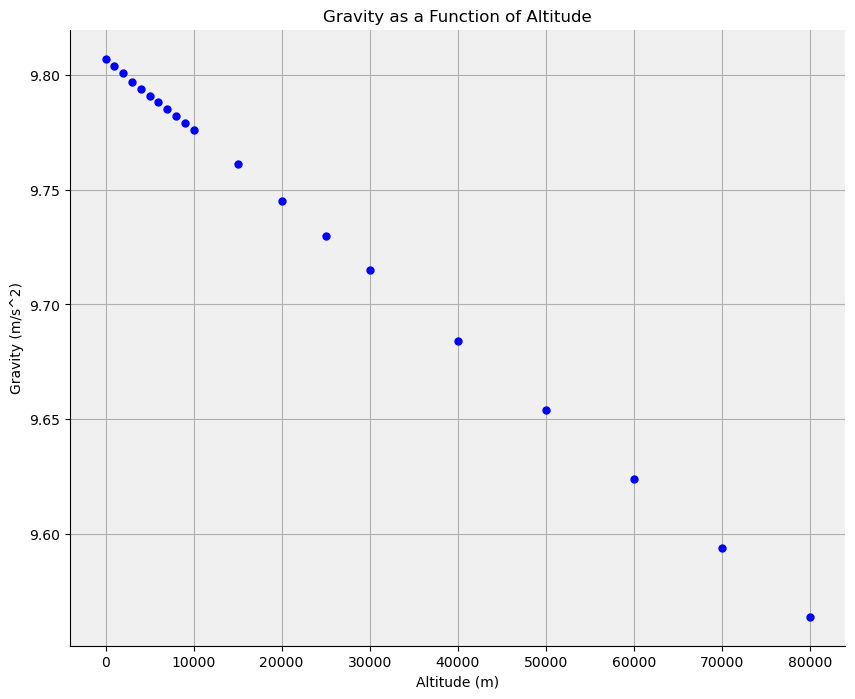

In [7]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
if use_errors == True:
    plt.errorbar(data.altitude, data.gravity, yerr=gravity_uncertainty, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)
else:
    plt.plot(data.altitude, data.gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)

# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")
#plt.yscale("log")

Fit the data with the pre-defined function

In [27]:
def linear_fit_function(x,a,b):
    return a*np.array(x) + b

In [28]:
init_vals = [0, 0]

if use_errors == False:
    popt, pcov = curve_fit(linear_fit_function, data.altitude, data.gravity, p0=init_vals)
else:
    popt, pcov = curve_fit(linear_fit_function, data.altitude, data.gravity, sigma=gravity_uncertainty, absolute_sigma=True, p0=init_vals)

print (popt)
print (pcov)

[-3.03863758e-06  9.80635969e+00]
[[ 2.14892129e-17 -4.78135087e-13]
 [-4.78135087e-13  2.31385080e-08]]


In [29]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(linear_fit_function(altitude[i],*popt))
    chi2 += (data.gravity[i]-yfit[i])*(data.gravity[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

Chi^2 / dof = 3.632E-06 / 18


Draw the graph

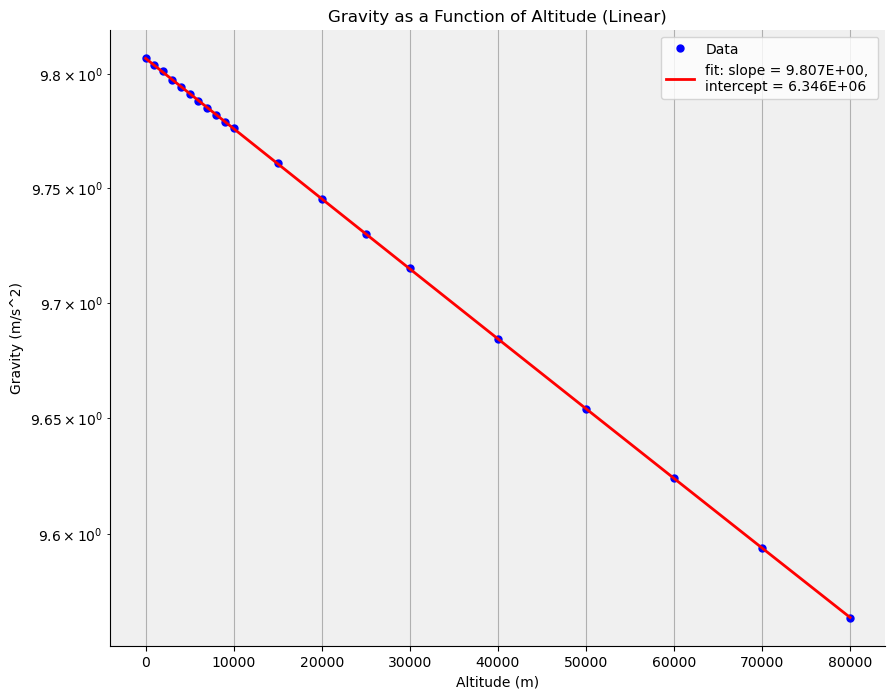

In [36]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(data.altitude, data.gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')
plt.plot(data.altitude,yfit,color='r', linewidth=2, label = 'fit: slope = %.3E, \nintercept = %.3E' % tuple(popt))

# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude (Linear)")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")
plt.yscale("log")
plt.legend()

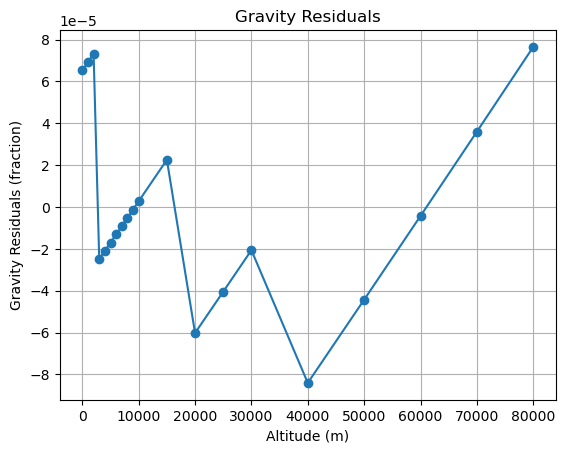

In [31]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (fraction)')
plt.grid(True)

plt.plot(altitude, (data.gravity - linear_fit_function(data.altitude, *popt))/data.gravity, 'o-')

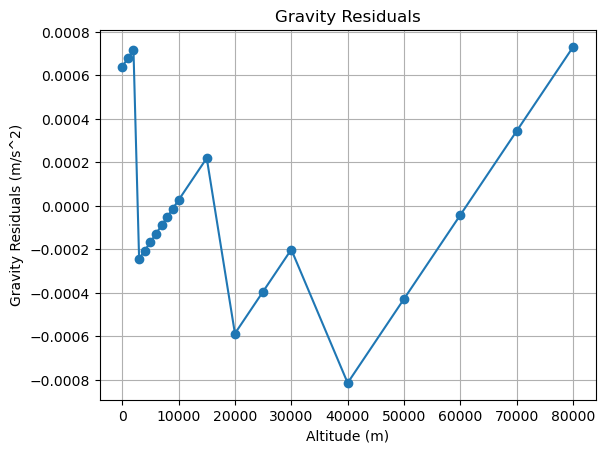

In [32]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (m/s^2)')
plt.grid(True)

plt.plot(data.altitude, (data.gravity - linear_fit_function(data.altitude, *popt)), 'o-')
residuals = (data.gravity - linear_fit_function(data.altitude, *popt))
popt_exponential = popt

Clearly the residuals are showing something is off, but of course gravity isn't linear with height.

In [37]:
def real_fit_function(x, g, R): # courtesy of https://en.wikipedia.org/wiki/Gravity_of_Earth -> Variation in magnitude -> Altitude
    return g * np.square((R / (R + np.array(x))))

In [38]:
init_vals = [100, 1000]

if use_errors == False:
    popt, pcov = curve_fit(real_fit_function, data.altitude, data.gravity, p0=init_vals, maxfev = 60000)
else:
    popt, pcov = curve_fit(real_fit_function, data.altitude, data.gravity, sigma=gravity_uncertainty, absolute_sigma=True, p0=init_vals, maxfev = 60000)

print (popt)
print (pcov)

[9.80673654e+00 6.34642601e+06]
[[ 2.33761509e-08 -1.01159493e+00]
 [-1.01159493e+00  9.56222906e+07]]


In [39]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(real_fit_function(altitude[i],*popt))
    chi2 += (data.gravity[i]-yfit[i])*(data.gravity[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

Chi^2 / dof = 1.399E-06 / 18


Draw the graph

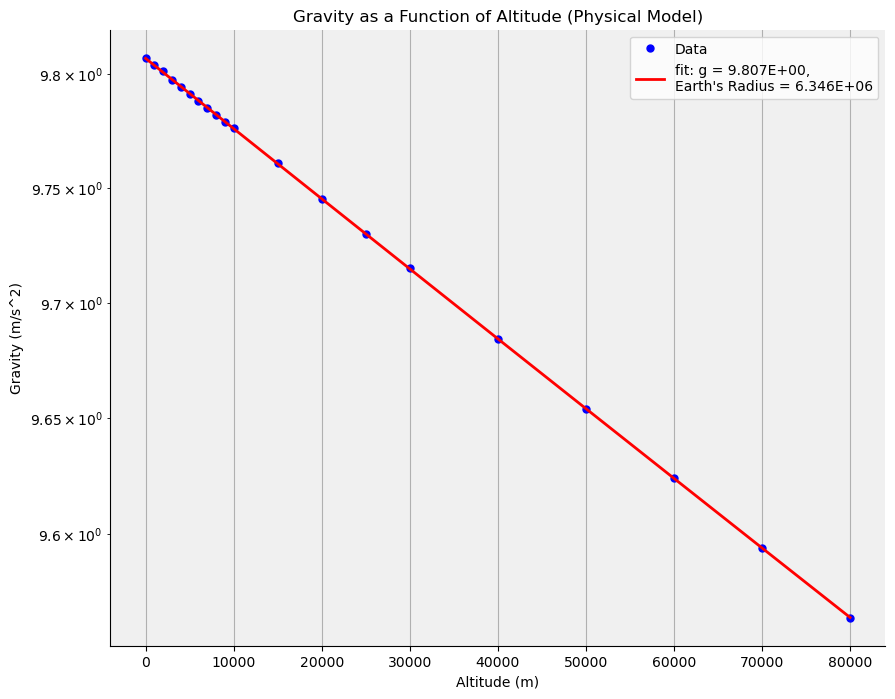

In [40]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(data.altitude, data.gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')
plt.plot(data.altitude,yfit,color='r', linewidth=2, label = 'fit: g = %.3E, \nEarth\'s Radius = %.3E' % tuple(popt))

# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude (Physical Model)")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")
plt.yscale("log")
plt.legend()

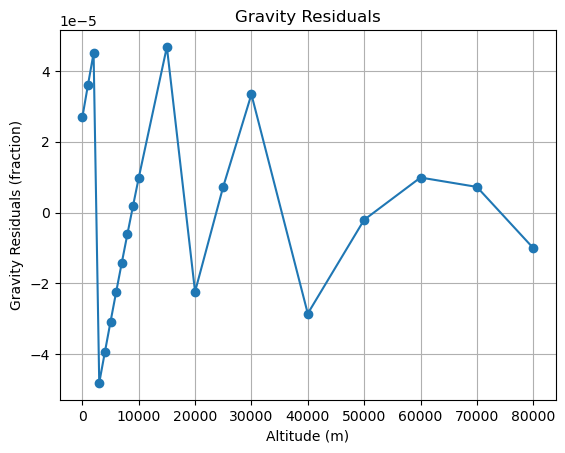

In [41]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (fraction)')
plt.grid(True)

plt.plot(altitude, (data.gravity - real_fit_function(data.altitude, *popt))/data.gravity, 'o-')

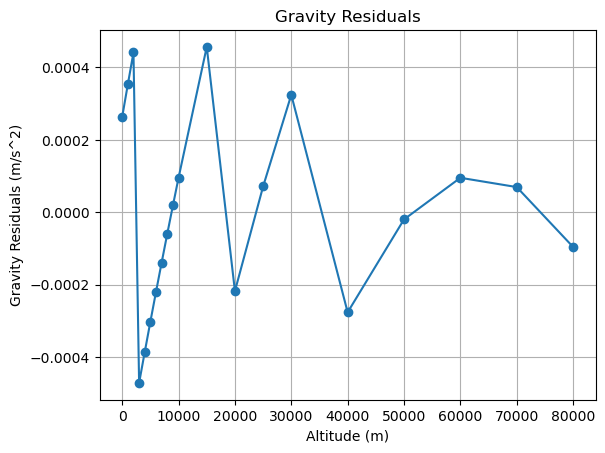

In [42]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (m/s^2)')
plt.grid(True)

plt.plot(data.altitude, (data.gravity - real_fit_function(data.altitude, *popt)), 'o-')
residuals = (data.gravity - real_fit_function(data.altitude, *popt))
popt_exponential = popt

Residuals here look more "normal", an of lesser magnitude than the linear fit residuals.